In [1]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt

# London Crime Clustering

The purpose of this notebook is to examine the case of clusters of certain types of crime in London and to also advance my understanding of hierarchical clustering.

The theory is that given that 'birds of a feather flock together' then if different types of crime were examined in London then clusters of certain types of crime would appear geographically concentrated. For example, if one locality has a high proportion of knife crime then it would be thought that the locality next door would also be likely to have a high proportion of crime as well. Thus, if we were to identify certain types of clusters, then localities close together would naturally be expected to belong to the same cluster.



# Hierarchical clustering

Hierarchical clustering is part of the unsupervised learning models of machine learning. This means that we don't have a defined target variable unlike in regression or classification. The point of this machine learning algorithm therefore is to identify distinct custers of objects that share similar characteristics. Other machine learning algorithms that fit in with part of this family include kmeans, DBscan. 

This specific algorithm comes in two forms: top-down or bottom up. The first, top-down, starts treats all points as part of a single cluster and then gradually breaks them up into seperate clusters (divissive) until they are all part of their own cluster. The second, bottom-up, starts from the basis that all points are part of their own cluster and then groups the two closest points together, iteratively, until they are all part of a single cluster (Agglomerative). This hierarchy of clusters can be can be represnted as a tree (or a dendrogram) as below, the leaves representing individual clusters and distance increasing as go up the clusters. This can be visualised as:

<img src="files/Img/Hierarchical_Clus_den.png"> 

<img src="files/Img/Hierarchical_Clus_plt.png">

The most common form of this is the Agglomerative method. The outcome of this can be influenced by two main things: the distance method chosen (how the distance between points is calculated) and the linkage method chosen (between which points the distance is calculated). The different forms of this are as follows:

## Affinity 
[1](https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d) [2](https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/)

These will also depend on the choice of distance metric (affinity) used as well:

### Euclidean (l2)

This is the default distance metric used to measure the distance between clusters and is simply the straight line distance between two points. This is mathematically expressed as:

$d(x,y) = \sqrt{\sum_i (x_i - y_i)^2}$

And visually represented as:

<img src="files/Img/euclid_dist.png">


### Manhattan (l1)

This distance is the sum of absolute difference between points across all the dimensions. This works as if there was grid like path between the points. This is mathematically expressed as:

$d(x,y) = \sum_{n=1} |x_i - y_i|$

And visually represented as:

<img src="files/Img/Manhat_dist.png">

This is also known as Taxicab Geometry and City Block Distance among others. This distance is often good for sparse features.

### Cosine

This distance metric measures the degree of angle between two vectores. This is used when the magnitude between points does not matter but the orientation does and is often used in natural language programming. This is measured as:

$\cos(\theta) = \frac{A \dot B}{||A||*||B||}$

### Precomputed

This is used if you already have a precomputed distance matrix for your observations.

The chosen metric aims to maximise the distance between samples in different classes and minimises the distance between each class [3](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)


## Linkage

The formation of these groups depends on the choice of different linkage metrics:

### Single/Min

This measures the similarity of two clusters as equal to the minimum of the similarity between the points closest to each other. Mathematically this is represented as:

Sim($C_1$, $C_2$) = Min Sim($P_i$, $P_j$) such that $P_i \in C_1$ & $P_j \in C_2$

And visually represented as:

<img src="files/Img/Min_dist.png">

The benefit of this measure is that it can deal with non-standard shapes of clusters, but cannot seperate clusters properly if there is noise.


### Complete/maximum 

This is the opposite to the minimum approach as the simialrity of the two clusters is equal to the maximum of the similarity between points within each of the clusters. This can be wriiten as:

Sim($C_1$, $C_2$) = Max Sim($P_i$, $P_j$) such that $P_i \in C_1$ & $P_j \in C_2$

And visually represented as:

<img src="files/Img/Max_dist.png">

This does well in seperating clusters if there is noise between them, but it is biased towards circular clusters and tends to break up large clusters.

### Average 

This linkage measure uses the average of the distances of all observations of the two sets. Mathematically this is represented as:

sim ($C_1$, $C_2$) = $\sum_{ij} (P_i, P_j)/|C_1|*|C_2|$

And visually represented as:

<img src="files/Img/avg_dist.png">

This does well in seperating clusters if tehre is noise between the clusters but is biased towards clusters that form blobs.

### Wards

This approach of calculating similarity between the two clusters is the same as group average, excpet this calculates the sum of squares of the distances $P_i$ and $P_j$. Essentiallt this minimises the variance of the clusters being merged. Mathematically this can be written as:

sim($C_1$, $C_2$) = $\sum (dist(P_i, P_j))^2/|C_1|*|C_2|$

And visually represented as:

<img src="files/Img/Wards_dist.png">

The benefits of this method is that it does well in seperating clusters if there is noise but it is biased towards circular groups of clusters.

The benefits of hierarchical clustering, in comparison to other methods of clustering, is that it does not need the number of clusters to be specified. Furthermore, the algorithm is not that sensitive to the distance metric. This is especially useful when the underlying data has a hierarchical structure or that is what we expect from the data. However, this comes at the cost of lower efficiency due to a time complxity of O(n³) and space complexity of O(n²). Furthermore there is no natural performance metric for hierarchical clustering to tell which number of clusters best fits the data, unlike with kmeans or DBscan. [4](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec) [5](https://www.saedsayad.com/clustering_hierarchical.htm#:~:text=In%20average%20linkage%20hierarchical%20clustering,point%20in%20the%20other%20cluster.)

# Application of hierarchical clustering

The focus of this application will be on London crime data. Thus, data is extracted from the London Data store on crimes that occur at the LSOA level [6](https://data.london.gov.uk/). This level is chosen because they represent the most standardised unit in terms of the number of households that were available. This reduces some potential variance that could have occured as a result of non-standard geographical units.

In [2]:
crime = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/644a9e0d-75a3-4c3a-91ad-03d2a7cb8f8e/MPS%20LSOA%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")

Once the data has been loaded in we want to inspect the format that the data is in and how it could be cleaned for our purpose of clustering.

In [3]:
crime.head(10)

,LSOA Code,Borough,Major Category,Minor Category,201903,201904,201905,201906,201907,201908,...,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101
0,E01000006,Barking and Dagenham,Arson and Criminal Damage,Arson,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,E01000007,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,E01000009,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E01000010,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,E01000011,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,E01000013,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,E01000016,Barking and Dagenham,Arson and Criminal Damage,Arson,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,E01000017,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,E01000018,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9,E01000021,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
crime.tail(10)

,LSOA Code,Borough,Major Category,Minor Category,201903,201904,201905,201906,201907,201908,...,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101
102845,E01033599,Westminster,Violence Against the Person,Violence without Injury,4,1,2,0,3,0,...,2,2,2,4,3,1,5,2,3,1
102846,E01033600,Westminster,Violence Against the Person,Violence without Injury,0,1,1,0,0,0,...,1,0,4,2,2,0,0,2,1,2
102847,E01033601,Westminster,Violence Against the Person,Violence without Injury,2,1,9,0,2,1,...,0,3,1,5,1,3,2,4,3,0
102848,E01033602,Westminster,Violence Against the Person,Violence without Injury,4,3,1,1,4,2,...,4,1,1,2,0,6,4,7,1,1
102849,E01033603,Westminster,Violence Against the Person,Violence without Injury,2,1,2,4,1,8,...,2,6,2,10,2,2,2,6,3,6
102850,E01033604,Westminster,Violence Against the Person,Violence without Injury,3,7,5,7,5,10,...,3,4,7,4,5,5,12,4,8,6
102851,E01033605,Westminster,Violence Against the Person,Violence without Injury,5,7,2,1,11,5,...,5,4,4,5,4,4,5,2,4,7
102852,E01033606,Westminster,Violence Against the Person,Violence without Injury,1,1,1,3,0,2,...,1,1,1,0,0,4,2,0,0,1
102853,E01033607,Westminster,Violence Against the Person,Violence without Injury,1,1,1,1,1,3,...,1,3,1,2,3,0,1,2,2,1
102854,E01033608,Westminster,Violence Against the Person,Violence without Injury,1,0,0,1,2,0,...,3,0,2,0,2,2,2,2,1,2


In [5]:
crime.describe()

,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,...,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101
count,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,...,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000,102855.000000
mean,0.739575,0.697808,0.719887,0.714851,0.757416,0.710155,0.704302,0.755199,0.735657,0.702163,...,0.457547,0.536756,0.581945,0.658694,0.659871,0.665607,0.664985,0.601536,0.558903,0.486131
std,3.276726,3.213819,2.821387,2.775115,2.680170,2.516713,2.549372,2.904722,2.886423,3.029897,...,1.074519,1.225427,1.333193,1.669854,1.811318,1.797200,1.847555,1.401491,1.593200,1.137485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,464.000000,391.000000,306.000000,250.000000,226.000000,218.000000,270.000000,307.000000,278.000000,366.000000,...,60.000000,67.000000,72.000000,104.000000,141.000000,125.000000,129.000000,53.000000,139.000000,31.000000


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102855 entries, 0 to 102854
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   LSOA Code       102855 non-null  object
 1   Borough         102855 non-null  object
 2   Major Category  102855 non-null  object
 3   Minor Category  102855 non-null  object
 4   201903          102855 non-null  int64 
 5   201904          102855 non-null  int64 
 6   201905          102855 non-null  int64 
 7   201906          102855 non-null  int64 
 8   201907          102855 non-null  int64 
 9   201908          102855 non-null  int64 
 10  201909          102855 non-null  int64 
 11  201910          102855 non-null  int64 
 12  201911          102855 non-null  int64 
 13  201912          102855 non-null  int64 
 14  202001          102855 non-null  int64 
 15  202002          102855 non-null  int64 
 16  202003          102855 non-null  int64 
 17  202004          102855 non-nu

After inspection we can take away three things:
1. Firstly that there are 103,936 observations that are all non-null values. This means that data cleanup should be relatively easily as there are no nan values that woll have to be dealth with or inspected.
2. The data is split into months for 2019 and 2020. This means we could take a look at individual months in terms of crime data, or if we want to look at a single year then the data would have to be aggregated.
3. There are major types of crime and minor types of crime. These minor types of crime are subsets of each major type of crime category.

For our purpuse, 1 means that data cleaning is relatively simple, 2 means that since we want to focus on a single year the data needs to be aggreagted, but 3 warrants further inspection, which can be done by extracting the unique values of major and minor crime and see how they link.

In [7]:
#we can firstly extract the unique values to see what they are:
major_cats = crime["Major Category"].unique()
minor_cats = crime["Minor Category"].unique()

print(major_cats)
print(minor_cats)

['Arson and Criminal Damage' 'Burglary' 'Drug Offences'
 'Miscellaneous Crimes Against Society' 'Possession of Weapons'
 'Public Order Offences' 'Robbery' 'Theft' 'Vehicle Offences'
 'Violence Against the Person']
['Arson' 'Criminal Damage' 'Burglary - Business and Community'
 'Burglary - Residential' 'Drug Trafficking' 'Possession of Drugs'
 'Bail Offences' 'Bigamy' 'Dangerous Driving'
 'Disclosure, Obstruction, False or Misleading State'
 'Exploitation of Prostitution'
 'Fraud or Forgery Associated with Driver Records'
 'Going Equipped for Stealing' 'Handling Stolen Goods'
 'Making, Supplying or Possessing Articles for use i'
 'Obscene Publications' 'Other Forgery' 'Other Notifiable Offences'
 'Perjury' 'Perverting Course of Justice' 'Possession of False Documents'
 'Profitting From or Concealing Proceeds of Crime'
 'Threat or Possession With Intent to Commit Crimina' 'Wildlife Crime'
 'Other Firearm Offences' 'Possession of Article with Blade or Point'
 'Possession of Firearm with I

In [8]:
#we can then see how they group i.e. are minor crime specific subsets or are they seperate groups
crime_type = crime.groupby(["Major Category", "Minor Category"]).agg({"LSOA Code":"count"})
crime_type

LSOA Code
Major Category                       Minor Category                                               
Arson and Criminal Damage            Arson                                                    2008
                                     Criminal Damage                                          4826
Burglary                             Burglary - Business and Community                        4017
                                     Burglary - Residential                                   4829
Drug Offences                        Drug Trafficking                                         2859
                                     Possession of Drugs                                      4748
Miscellaneous Crimes Against Society Absconding from Lawful Custody                             50
                                     Bail Offences                                              94
                                     Bigamy                                                     25
                                     Concealing an Infant Death Close to Birth                   1
                                     Dangerous Driving                                         646
                                     Disclosure, Obstruction, False or Misleading State         72
                                     Exploitation of Prostitution                               36
                                     Forgery or Use of Drug Prescription                        79
                                     Fraud or Forgery Associated with Driver Records           158
                                     Going Equipped for Stealing                               734
                                     Handling Stolen Goods                                     925
                                     Making, Supplying or Possessing Articles for use i        629
                                     Obscene Publications                                     2872
                                     Offender Management Act                                    29
                                     Other Forgery                                             826
                                     Other Notifiable Offences                                1042
                                     Perjury                                                    10
                                     Perverting Course of Justice                              859
                                     Possession of False Documents                             406
                                     Profitting From or Concealing Proceeds of Crime           655
                                     Soliciting for Prostitution                                22
                                     Threat or Possession With Intent to Commit Crimina       2457
                                     Wildlife Crime                                              8
Possession of Weapons                Other Firearm Offences                                     84
                                     Possession of Article with Blade or Point                2542
                                     Possession of Firearm with Intent                         559
                                     Possession of Firearms Offences                           895
                                     Possession of Other Weapon                               2455
Public Order Offences                Other Offences Against the State, or Public Order        3609
                                     Public Fear Alarm or Distress                            4780
                                     Racially or Religiously Aggravated Public Fear, Al       4089
                                     Violent Disorder                                          112
Robbery                              Robbery of Business Property                             1774
                              

What this shows is that there are a large number of minor crimes, while there is only 10 major crime categories. these minor crimes are also specific subsets of each major crime (there appears no overlap in minor catgeries within each major category). If we were to focus on the large number of minor categories our clusters may be difficult to interpret because of the variability in terms of the number of LSOAs within each category and the high dimensionality of the data that would result of using many features. Therefore, the focus of this is on the Major categories as that is what we are interested in and should lead to greater intepretability.

We could also see that from above the columns are for each month in 2019 and 2020. Our interest here is identify crime clusters over a single year, and since 2020 was the year of covid, we want to inspect the year 2019 first. For this we have to sum all columns from each year into a single column as we do below:

In [9]:
cols_to_sum_19 = [col for col in crime.columns if "2019" in str(col)]
cols_to_sum_20 = [col for col in crime.columns if "2020" in str(col)]

crime["2019"] = crime[cols_to_sum_19].sum(axis = 1)
crime["2020"] = crime[cols_to_sum_20].sum(axis = 1)

We can then extract only the data that we need in terms of each LSOA, Major cateory, 2019 and 2020.

In [10]:
crime = crime[["LSOA Code", "Major Category", "2019", "2020"]]
crime

,LSOA Code,Major Category,2019,2020
0,E01000006,Arson and Criminal Damage,1,2
1,E01000007,Arson and Criminal Damage,0,1
2,E01000009,Arson and Criminal Damage,2,0
3,E01000010,Arson and Criminal Damage,3,0
4,E01000011,Arson and Criminal Damage,0,0
...,...,...,...,...
102850,E01033604,Violence Against the Person,54,76
102851,E01033605,Violence Against the Person,44,44
102852,E01033606,Violence Against the Person,12,14
102853,E01033607,Violence Against the Person,14,16


To make sure that this has been done correctly, we can examine some LSOA values.

In [11]:
crime[crime["LSOA Code"] == "E01000006"]

,LSOA Code,Major Category,2019,2020
0,E01000006,Arson and Criminal Damage,1,2
64,E01000006,Arson and Criminal Damage,5,4
252,E01000006,Burglary,11,5
362,E01000006,Drug Offences,0,1
444,E01000006,Drug Offences,5,24
648,E01000006,Miscellaneous Crimes Against Society,3,1
765,E01000006,Miscellaneous Crimes Against Society,1,0
1085,E01000006,Public Order Offences,2,0
1178,E01000006,Public Order Offences,3,0
1288,E01000006,Public Order Offences,0,3


We can see here that there are multiple entries for each Major category, and this will be a result of the different minor categories within each major categories. Consequently, we need to further aggregate these results, summing over each major category. 

Before we do this however we also want to subset this into 2019 and so we can drop the 2020 column from the dataset, while retaining the previous dataset.

In [12]:
#drop the 2019 column but do so iin creating a new 2019 labelled dataframe
crime_2019 = crime.drop(columns = ["2020"]).copy()

Then, to get the data into the correct format and aggregate across the major categories, since we currently have the data in a single column, which restricts our ability to run the cluster on multiple columns, we want to transform the data from a single column containing values for each LSOA and each Major crime category, into rows containing all data for a single LSOA across each Major crime Category. This can be done using the pivot table function while aggregating across the Major category column:

In [13]:
#use the pivot table function, set index to LSOA, column names to be the major categories, and values from the 2019 column
#we want to agg by the sum and we want to fill any empty values with a zero
crime_2019 = crime_2019.pivot_table(index= 'LSOA Code', columns = 'Major Category', 
                                    values = "2019", aggfunc = np.sum,
                                    fill_value = 0).reset_index()
#then rename the axis
crime_2019.rename_axis(None,axis=1, inplace=True)

A total crime column should also be created, as if we focused on the absolute number of crimes then there would be come types of crime that have greater variation and thus the clustering algorithm may focus on this result and the outputs may be difficult to interpret. Thus, a total column is created, with each crime type divided by the total amount of crime so that we get the percentage of crime that occurs within an area of that category, rather than focusing on areas that may have relatively high absolute levels of crime.

In [14]:
#extract the columns to sum
cols_to_sum = [col for col in crime_2019.columns if "LSOA" not in col]
#sum across the columns rather than rows
crime_2019["Total_crime"] = crime_2019[cols_to_sum].sum(axis=1)

In [15]:
#we then want to turn the previous columns into percentages
#do this by dividing over the total crime columns
for col in cols_to_sum:
    crime_2019[col] = crime_2019[col]/crime_2019["Total_crime"]

The results can then be inspected to make sure that the data cleaning has achieved the desired objective:

In [16]:
crime_2019

,LSOA Code,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Theft,Vehicle Offences,Violence Against the Person,Total_crime
0,E01000006,0.062500,0.114583,0.052083,0.041667,0.000000,0.052083,0.093750,0.072917,0.114583,0.395833,96
1,E01000007,0.041758,0.043956,0.134066,0.013187,0.010989,0.052747,0.114286,0.276923,0.057143,0.254945,455
2,E01000008,0.069149,0.079787,0.079787,0.010638,0.000000,0.069149,0.037234,0.218085,0.186170,0.250000,188
3,E01000009,0.055556,0.059829,0.098291,0.008547,0.004274,0.064103,0.111111,0.252137,0.072650,0.273504,234
4,E01000010,0.038238,0.036575,0.071488,0.009975,0.014131,0.054032,0.063175,0.453865,0.060682,0.197839,1203
...,...,...,...,...,...,...,...,...,...,...,...,...
4824,E01033742,0.116279,0.069767,0.046512,0.000000,0.000000,0.023256,0.023256,0.116279,0.395349,0.209302,43
4825,E01033743,0.043614,0.021807,0.012461,0.003115,0.003115,0.040498,0.009346,0.613707,0.077882,0.174455,321
4826,E01033744,0.116667,0.075000,0.025000,0.000000,0.000000,0.075000,0.016667,0.058333,0.200000,0.433333,120
4827,E01033745,0.149606,0.094488,0.055118,0.015748,0.007874,0.031496,0.023622,0.125984,0.204724,0.291339,127


In [17]:
crime_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   LSOA Code                             4829 non-null   object 
 1   Arson and Criminal Damage             4829 non-null   float64
 2   Burglary                              4829 non-null   float64
 3   Drug Offences                         4829 non-null   float64
 4   Miscellaneous Crimes Against Society  4829 non-null   float64
 5   Possession of Weapons                 4829 non-null   float64
 6   Public Order Offences                 4829 non-null   float64
 7   Robbery                               4829 non-null   float64
 8   Theft                                 4829 non-null   float64
 9   Vehicle Offences                      4829 non-null   float64
 10  Violence Against the Person           4829 non-null   float64
 11  Total_crime      

In [18]:
crime_2019.describe()

,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Theft,Vehicle Offences,Violence Against the Person,Total_crime
count,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,0.074422,0.114498,0.051542,0.012811,0.007759,0.058487,0.038343,0.175902,0.188695,0.277542,154.144336
std,0.038658,0.061802,0.041986,0.015676,0.009890,0.031188,0.031173,0.123487,0.097999,0.094532,264.962688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608,12.000000
25%,0.047619,0.070922,0.022727,0.000000,0.000000,0.037037,0.016667,0.090000,0.118280,0.211538,72.000000
50%,0.068966,0.102804,0.042553,0.010101,0.005051,0.056338,0.033333,0.141892,0.172840,0.273810,103.000000
75%,0.095238,0.145161,0.069930,0.018868,0.012739,0.076923,0.053942,0.226562,0.244681,0.340909,160.000000
max,0.365079,0.512195,0.521368,0.388268,0.083333,0.235294,0.296980,0.783410,0.630435,0.765182,7650.000000


Once we have confirmed the data is in the correct format, we can then see how it looks when it has been mapped:

In [19]:
#load in the LSOA map 
UK_LSOA = gpd.read_file("https://opendata.arcgis.com/datasets/1f23484eafea45f98485ef816e4fee2d_0.zip?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D")
#extract only the necessary information
UK_LSOA = UK_LSOA[["LSOA11CD", "geometry"]]

In [20]:
#merge the crime data with the LSOA file to create the London-crime dataframe
London_crime = UK_LSOA.merge(crime_2019, left_on = "LSOA11CD", right_on = "LSOA Code", how = "right")

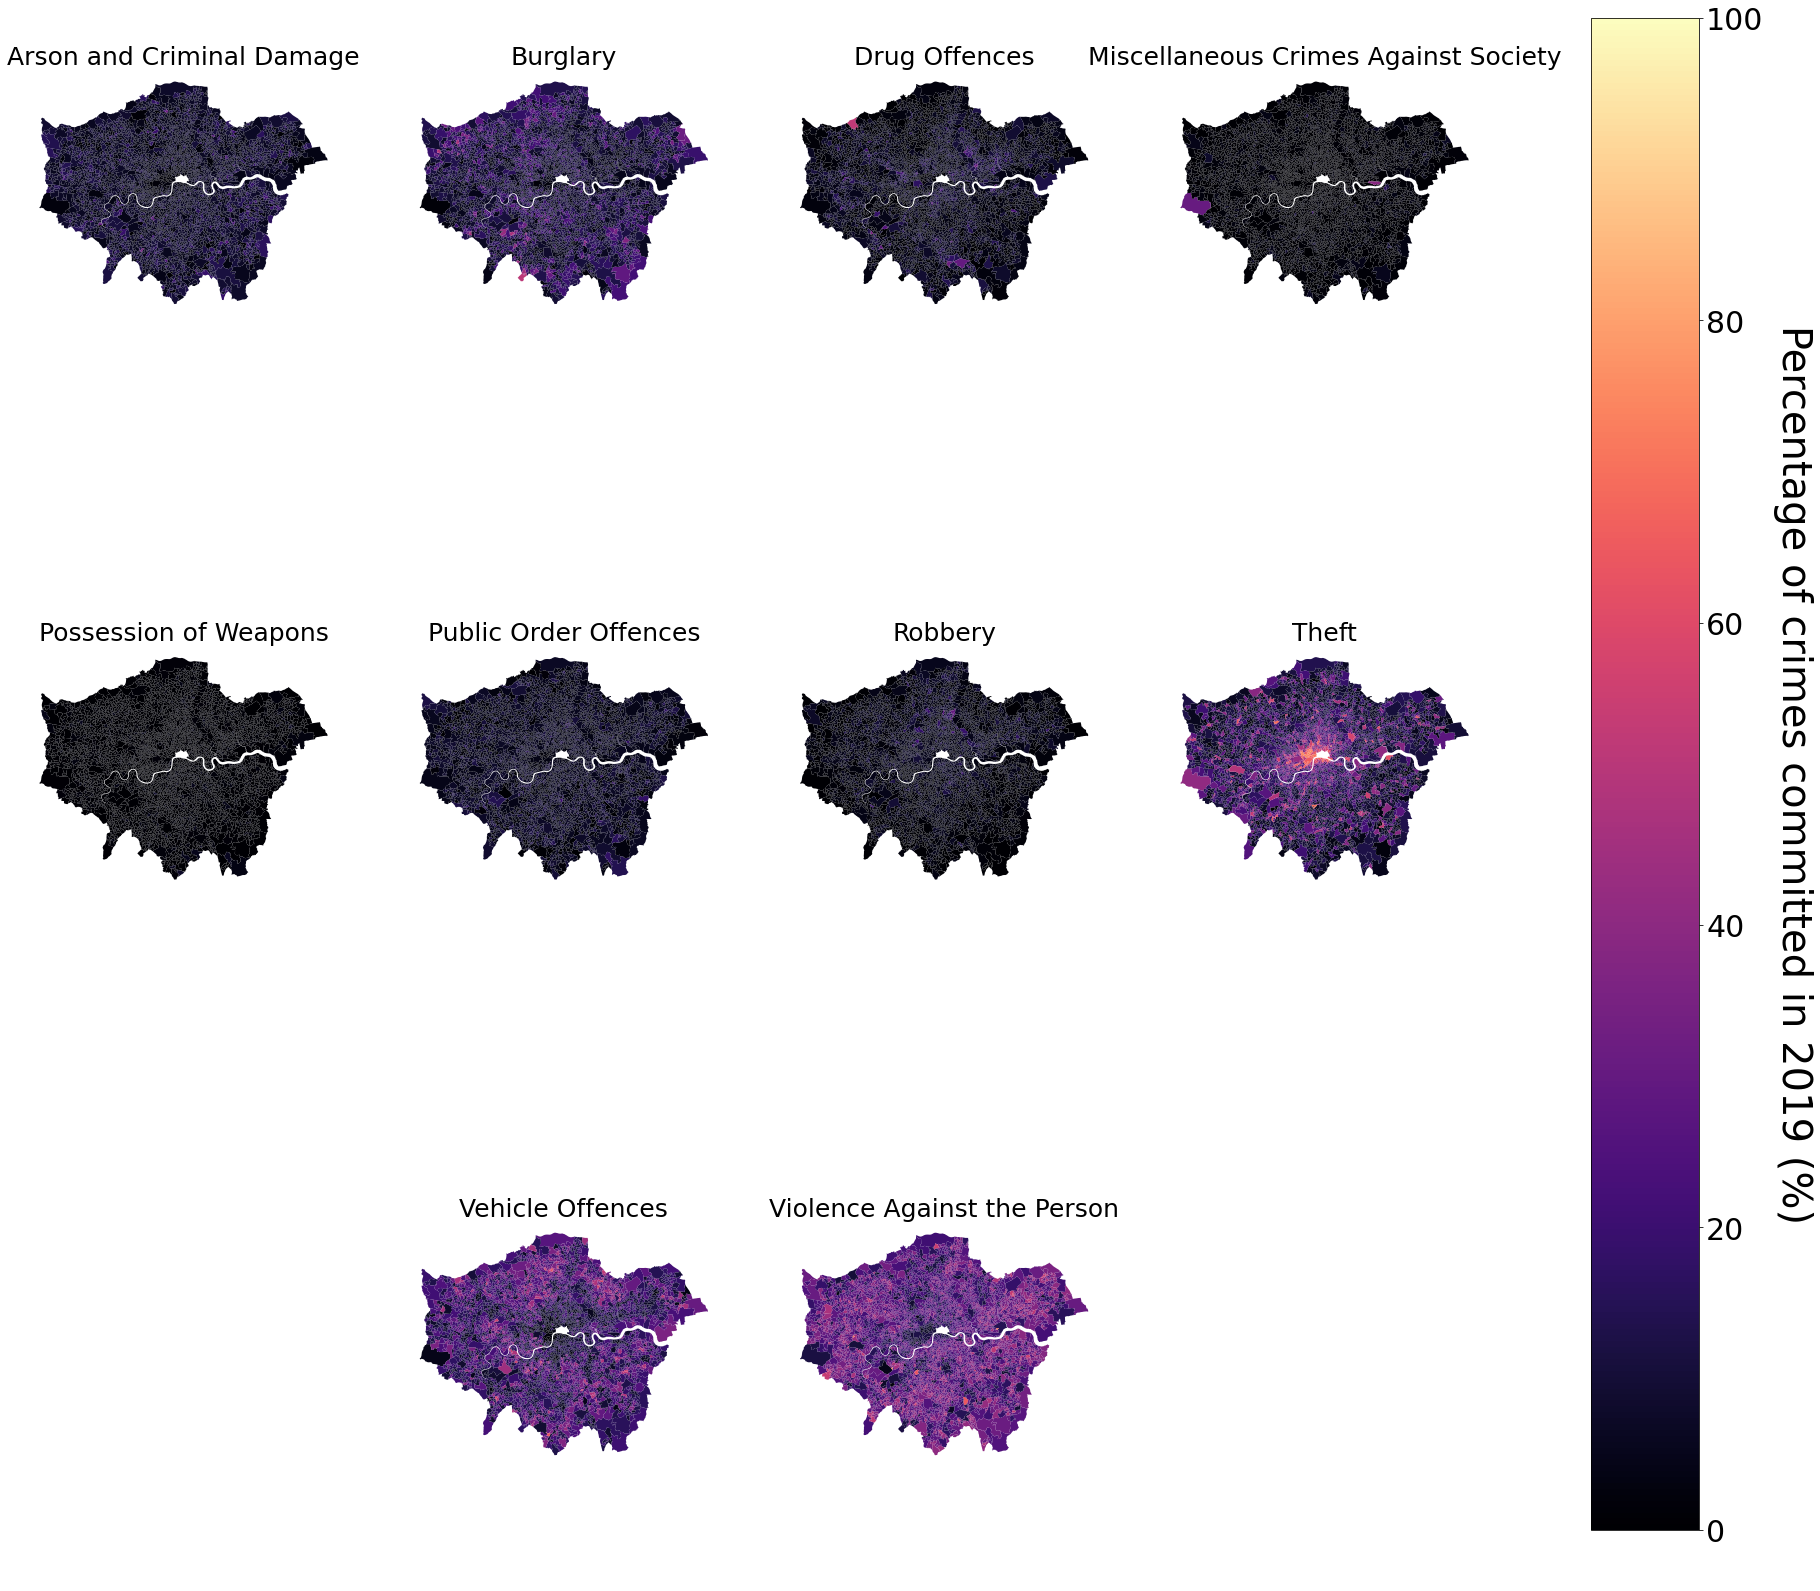

In [21]:
#we then want to map the result

#extract the columns that we don't want to plot
not_plot = ["LSOA11CD", "geometry", "LSOA Code", "Total_crime"]
#use this to extract the columns that we do want to plot
to_plot = [col for col in London_crime.columns if col not in not_plot]

#print(to_plot)

#create a subplot axis, given that we have 10 different categories this has to be a 3 by 4 matrix of plots
fig, axis = plt.subplots(3,4, figsize = (30,30))
#flatten the axis so that we can iterate over them
axis = axis.flatten()

#creating the plot function
#use the enumerate to get the value and its index
for i, col in enumerate(to_plot):
    #set the axis as in the rows
    ax = axis[i]
    #to make it cleaner move two axis across
    if i >=8:
        ax = axis[i+1]
    #plot the crime map using the magma color map
    crim_plt = London_crime.plot(column = col, ax=ax, cmap = "magma", vmin =0, vmax = 1)
    #remove the axis so that it looks cleaner
    ax.set_axis_off()
    #set the plot title as the column name
    ax.set_title(col, fontsize = 25)

    
#plt.subplots_adjust(right = 0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#cbar = plt.colorbar(cax=cbar_ax)

#adding a color bar for the overall plto
#https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
vmin, vmax = 0,100

#create a subaxis within the figure
fig = ax.get_figure()
plt.subplots_adjust(right = 0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7], label = "Percentage of crime")
#create a colorbar and plot it
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = fig.colorbar(sm, cax=cax)
#change the size of the tick parameters
cb.ax.tick_params(labelsize = 30)
#set the label title
#https://stackoverflow.com/questions/17475619/how-do-i-adjust-offset-colorbar-title-in-matplotlib
cb.set_label("Percentage of crimes committed in 2019 (%)", rotation = 270, fontsize= 40, labelpad = 50)
#
#cax.tight_layout()

#remove axis of plots not covered
axis[8].set_axis_off()
axis[11].set_axis_off()
#show the results
plt.show()

What this plot tells us is that four main categories of: Bulgrary, Theft, Vehcile Offences and Violence against the person appear to have the greatest variance in values and also the larget values in terms of percentages. What this could mean is that the clustering algorithm may be likely to focus on these four factors because of this. However, since we are concerned with identifying clusters that are dominated by a type of crime, any further standardising/normalising may remove valuable information that we are interested in. Thus, this variance is accepted at the current momement and may be inspected in terms of how the clusters trun out latter.

Therefore, now that we have seen the results spatially, we can attempt to cluster the results to see how the clusters develop:

In [22]:
#import the necessary module
from sklearn.cluster import AgglomerativeClustering

In [23]:
#extract the values that we want to plot
crime_clus = London_crime[to_plot]

In [24]:
#create the model that we want, setting the linkage to ward, the distance threshold to 4 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
model = AgglomerativeClustering(linkage="ward", distance_threshold = 4.3, n_clusters=None)
#fit the model to the data
model.fit(crime_clus)

AgglomerativeClustering(distance_threshold=4.3, n_clusters=None)

Once the model has been fit to the data we want actually visualise the results in how this maps onto London. So the first thing we do is extract the labels and add them to our original dataframe.

In [25]:
London_crime["Aggl_clus"] = model.labels_

We can then plot the results in terms of London.

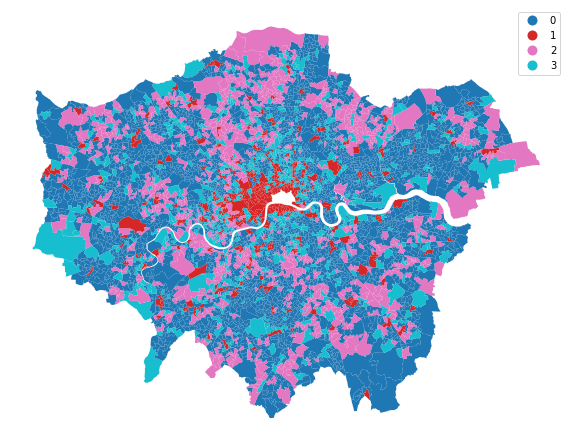

In [26]:
fig, ax = plt.subplots(figsize = (10,10))

#colors = ["red", "blue", "green", "pink"]

#color_map = {0: "red", 1: "blue", 2:"green", 3: "pink"}

#Aggl_colors = London_crime["Aggl_clus"].map(color_map)

London_crime.plot(column = "Aggl_clus", categorical = True, legend=True, ax=ax)


ax.set_axis_off()

What we can see here is that with the distance threshold set to 4 we get 4 clusters which are distributed across London. What is appears like from this inspection is that clsuter 1 is dominant in the centre of London but there are small patches across the rest of London. Cluster 2 tends to group together in the outer edges of London, while cluster 0 and 3 tend to be randomly distributed across London.

What we need to know next then is what do these clusters mean and how do they compare to each other in terms of the percenatges of crime between each cluster. This can be done by visualising the means of each of these clusters (although the distribution of clusters could also be used) which would allow us to assign labels to interpret each of these clusters:


In [27]:
agglom_means =London_crime.groupby("Aggl_clus")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

#agglom_means_T.reset_index(inplace=True)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T

Aggl_clus,0,1,2,3
Arson and Criminal Damage,0.086,0.040,0.067,0.059
Burglary,0.106,0.068,0.170,0.096
Drug Offences,0.059,0.042,0.032,0.056
Miscellaneous Crimes Against Society,0.015,0.008,0.011,0.011
Possession of Weapons,0.009,0.006,0.005,0.008
Public Order Offences,0.062,0.056,0.046,0.063
Robbery,0.037,0.047,0.031,0.050
Theft,0.124,0.491,0.122,0.292
Vehicle Offences,0.169,0.072,0.322,0.144
Violence Against the Person,0.335,0.171,0.195,0.221


In [28]:
agglom_means_T

Aggl_clus,0,1,2,3
Arson and Criminal Damage,0.086,0.040,0.067,0.059
Burglary,0.106,0.068,0.170,0.096
Drug Offences,0.059,0.042,0.032,0.056
Miscellaneous Crimes Against Society,0.015,0.008,0.011,0.011
Possession of Weapons,0.009,0.006,0.005,0.008
Public Order Offences,0.062,0.056,0.046,0.063
Robbery,0.037,0.047,0.031,0.050
Theft,0.124,0.491,0.122,0.292
Vehicle Offences,0.169,0.072,0.322,0.144
Violence Against the Person,0.335,0.171,0.195,0.221


C:\Users\phili\anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


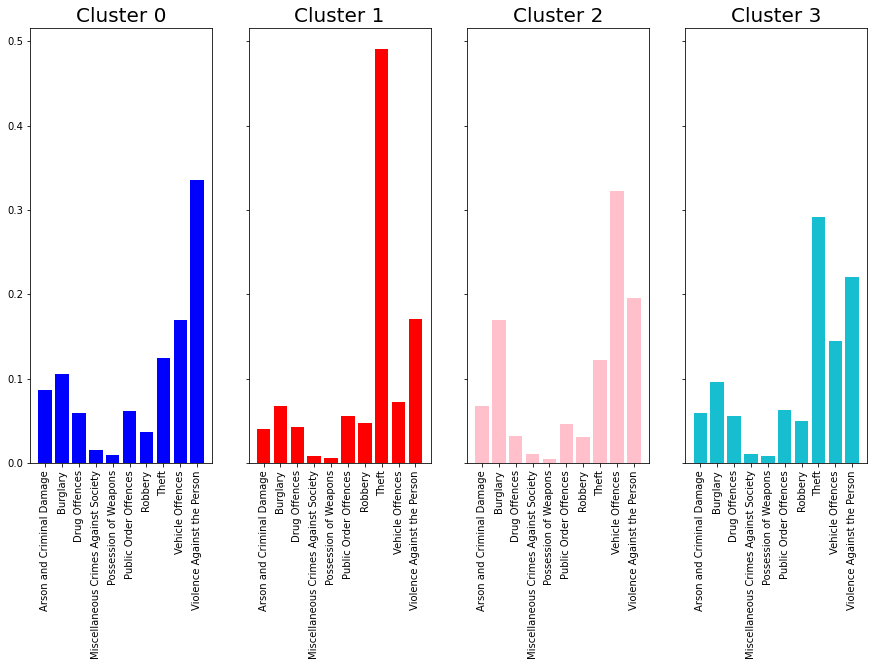

In [29]:
agglom_means_T.reset_index(inplace=True)

#get the colours
colors = ["blue", "red", "pink", "tab:cyan"]

#create subplots for each cluster
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 20)

From this we can see that Cluster 0 on average has relatively high Violence against the person, Arson and Criminal Damage and Drug offences compared to the other clusters. Cluster 1 is dominated by incidences of Theft, much more so than any of the other clusters but has relatively low violence against the person. Cluster 2 is dominated by instances of vehicle offences and violence against the person and a relatively high burglarly rate, while cluster 3 has the second highest theft rate, while also having the second highest incidenence of vehicle offences and Violence against the person.

Based on this therefore we could assign labels such that:

Cluster 0 - Violence against the person<br>
Cluster 1 - Theft <br>
Cluster 2 - Vehicle offences and Burglarly<br>
Cluster 3 - Theft and Violence against the person<br>

This labelling suggests some degree of overlap between cluster 0, 1 and 3 potentially. We can explore this further by examining the sizes of the clusters and how these play out.

In [30]:
agglom_sizes = London_crime.groupby("Aggl_clus").size()
agglom_sizes

Aggl_clus
0    2773
1     349
2     967
3     740
dtype: int64

From this we can see that cluster 1 and 3 are much smaller than 0 or 2 (in the case of cluster 0 and 1 cluster 1 is 1/4 of the size of the cluster), which could suggest that this is not the optimal clustering.

Given that this is hierarchical clustering, we can aim to see how the model has behaved using the dendrogram. This shows the hierarchical structure in terms of how the model behaves and can be done using the following code:

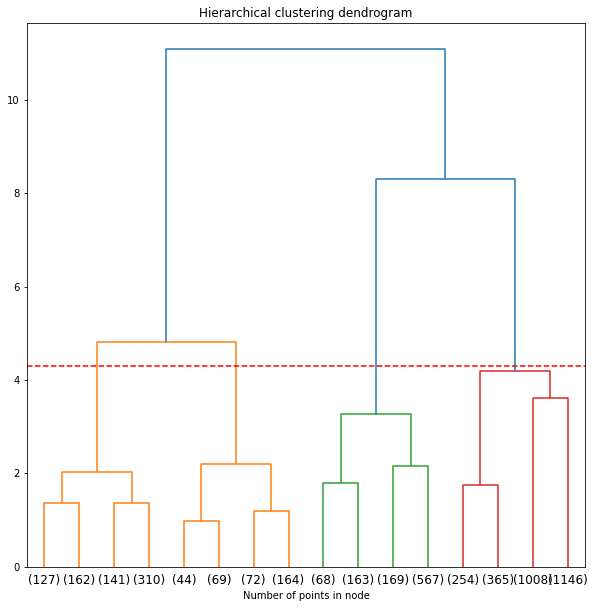

In [31]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 4.3, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

What this shows is that with the current distance measure we get the four clusters, however we can see that at a slightly greater that two clusters merge and then moves into three clusters. This would suggest that cluster 1 and 3 would be better merging. At this point, the large distance until we see clusters merge again suggests that these clusters are relatively more stable. Thus, we can change the distance metric to a distance threshold of 6, which we can get three clusters and explore this again. We could also look at this the other way and reduce the cluster distance to 3 and split up to tho largest clusters while keeping the two smaller clusters are relatively the same size. Seen on the dendrogam this shows up as:

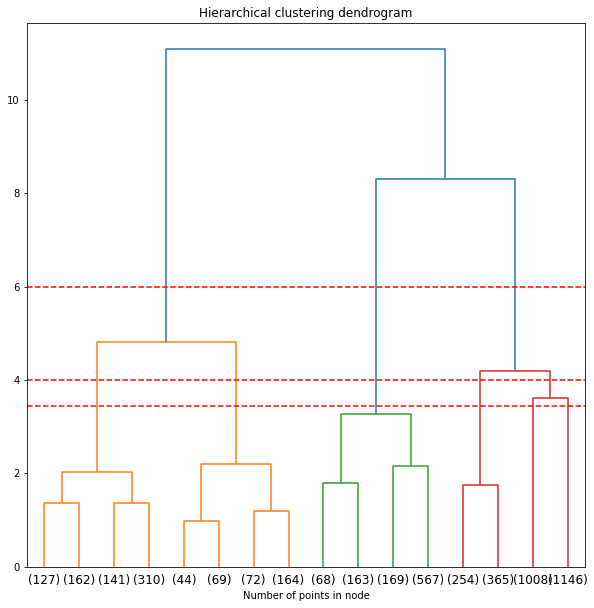

In [32]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 4, color = "r", linestyle = "--")
plt.axhline(y = 6, color = "r", linestyle = "--")
plt.axhline(y = 3.45, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

Thus we can follow the same workflow as the previous clustering to see how the clusters look when we have a distance metric of 6 and 3:

In [33]:
#create the model that we want, setting the linkage to ward, the distance threshold to 4 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
model6 = AgglomerativeClustering(linkage="ward", distance_threshold = 6, n_clusters=None)
#fit the model to the data
model6.fit(crime_clus)

AgglomerativeClustering(distance_threshold=6, n_clusters=None)

In [34]:
London_crime["Aggl_clus_6"] = model6.labels_

In [35]:
#create the model that we want, setting the linkage to ward, the distance threshold to 4 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
model3_45 = AgglomerativeClustering(linkage="ward", distance_threshold = 3.45, n_clusters=None)
#fit the model to the data
model3_45.fit(crime_clus)

AgglomerativeClustering(distance_threshold=3.45, n_clusters=None)

In [36]:
London_crime["Aggl_clus_3_45"] = model3_45.labels_

Text(0.5, 1.0, 'Distance threshold 3.45 cluster')

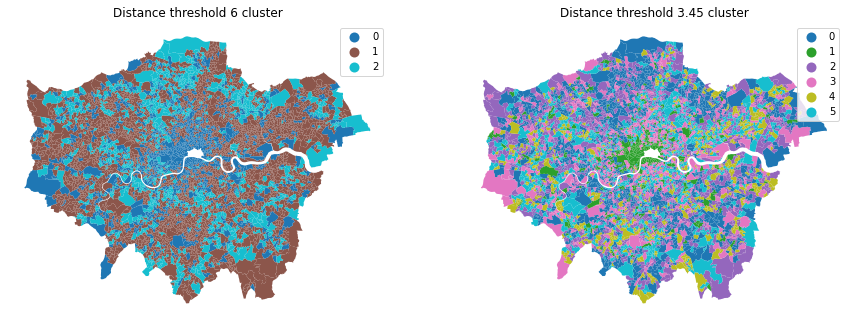

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (15,30))

London_crime.plot(column = "Aggl_clus_6", categorical = True, legend=True, ax=ax[0])
ax[0].set_axis_off()
ax[0].set_title("Distance threshold 6 cluster")

#London_crime.plot(column = "Aggl_clus", categorical = True, legend=True, ax=ax[1])
#ax[1].set_axis_off()
#ax[1].set_title("Distance threshold 4 cluster")

London_crime.plot(column = "Aggl_clus_3_45", categorical = True, legend=True, ax=ax[1])
ax[1].set_axis_off()
ax[1].set_title("Distance threshold 3.45 cluster")

C:\Users\phili\anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


Text(0.5, 0.98, 'Clusters with distance threshold 6')

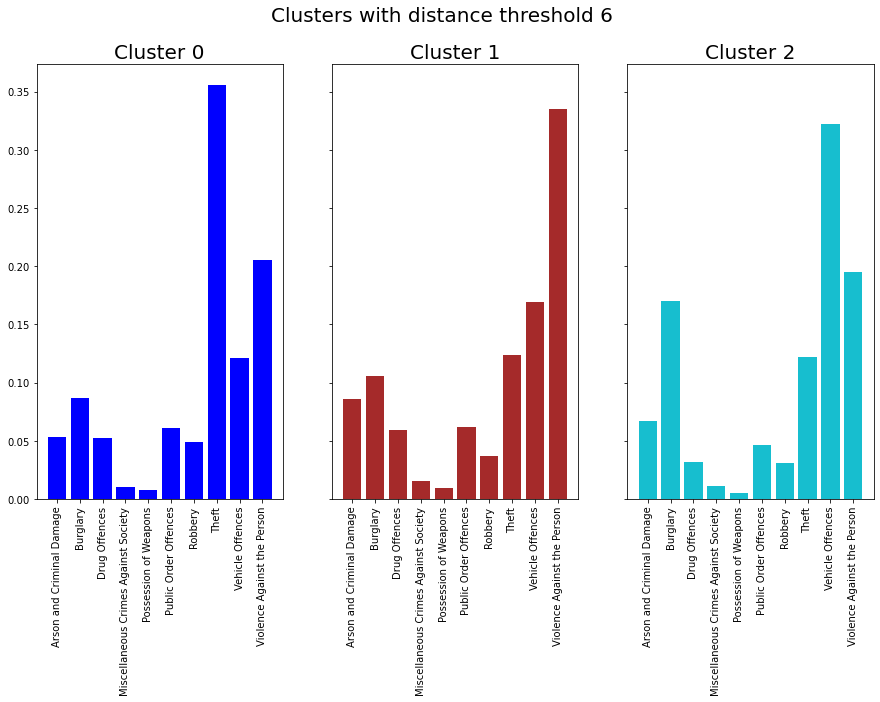

In [38]:
agglom_means =London_crime.groupby("Aggl_clus_6")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)

agglom_means_T.reset_index(inplace=True)

colors = ["blue", "brown", "tab:cyan"]

fig, ax = plt.subplots(1,3, figsize = (15,8), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],  color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
        
plt.suptitle("Clusters with distance threshold 6", fontsize = 20)

In [39]:
agglom_sizes = London_crime.groupby("Aggl_clus_6").size()
agglom_sizes

Aggl_clus_6
0    1089
1    2773
2     967
dtype: int64

C:\Users\phili\anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 0.98, 'Clusters with distance threshold 3')

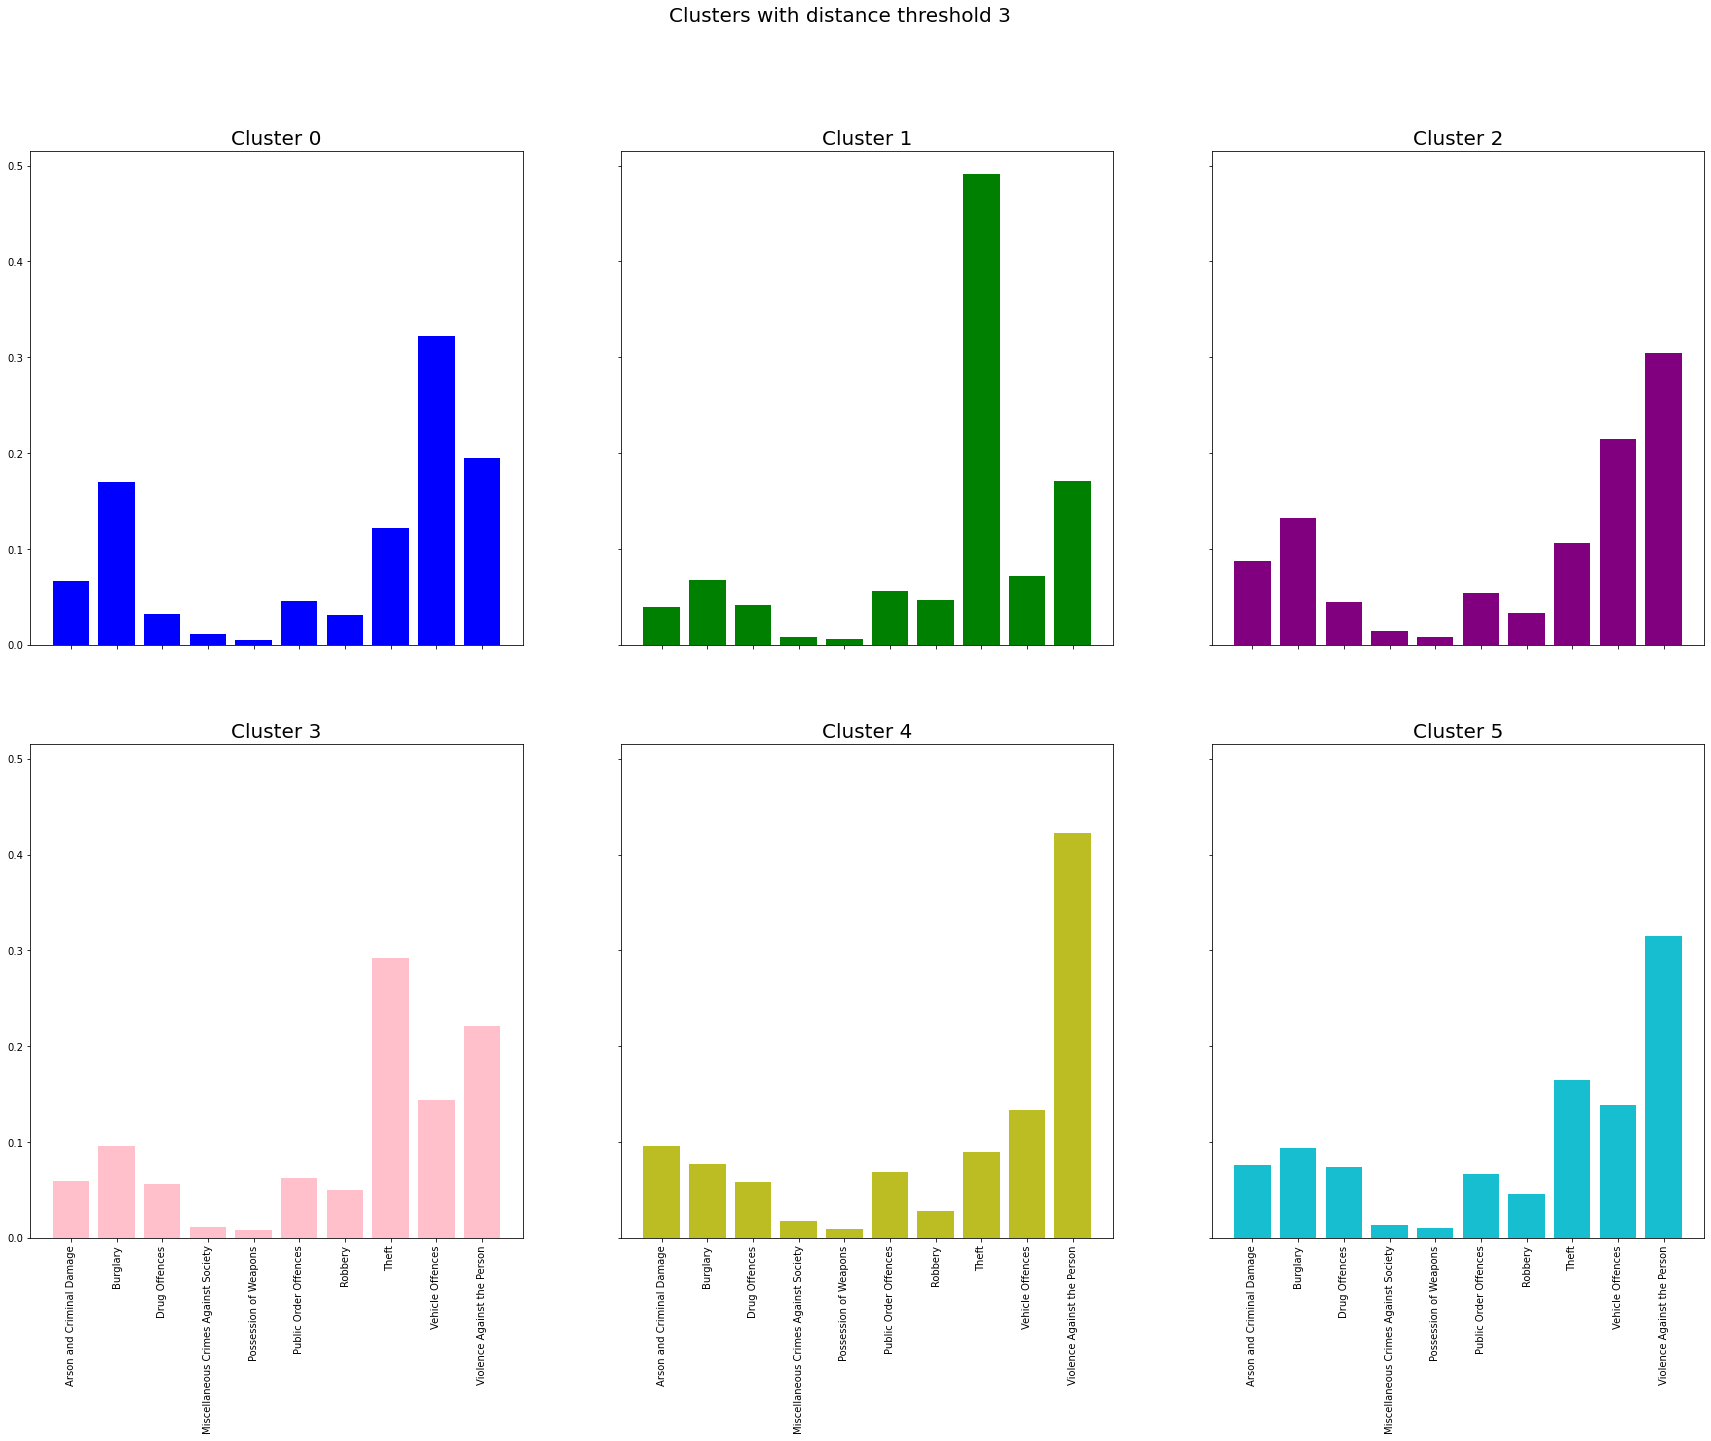

In [40]:
agglom_means =London_crime.groupby("Aggl_clus_3_45")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)

agglom_means_T.reset_index(inplace=True)

colors = ["blue", "green", "purple", "pink", "tab:olive", "tab:cyan"]

fig, ax = plt.subplots(2,3, figsize = (30,20), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],
               color = colors[i-1])
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
        
plt.suptitle("Clusters with distance threshold 3", fontsize = 20)

Text(0.5, 1.0, 'Clusters with distance threshold 3')

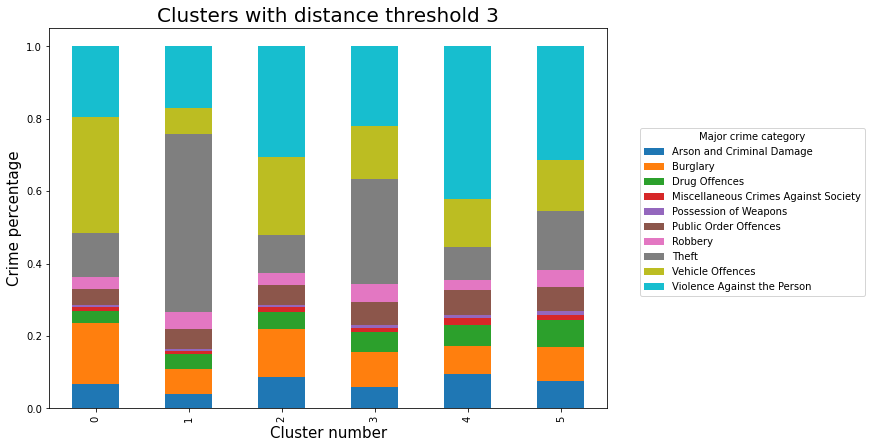

In [41]:
agglom_means =London_crime.groupby("Aggl_clus_3_45")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)

agglom_means_T.reset_index(inplace=True)

agglom_means_T.set_index('index', inplace=True)
agglom_means_T.rename_axis(None,axis=1, inplace=True)
agglom_means_T.T

fig, ax = plt.subplots(figsize = (10,10))

agglom_plot = agglom_means_T.T.plot.bar(stacked=True, figsize=(10,7), ax=ax)
agglom_plot.legend(title='Major crime category', bbox_to_anchor=(1.05, 0.75), loc='upper left')
ax.set_xlabel("Cluster number", fontsize = 15)
ax.set_ylabel("Crime percentage", fontsize = 15)
ax.set_title("Clusters with distance threshold 3", fontsize = 20)

In [42]:
agglom_sizes = London_crime.groupby("Aggl_clus_3_45").size()
agglom_sizes

Aggl_clus_3_45
0     967
1     349
2    1146
3     740
4     619
5    1008
dtype: int64

From this we can see that, for the three clusters, the size difference is no longer as large and examining the averages these can be interpreted as:

Cluster 0 - Mostly central London Theft <br>
Cluster 1 - Around London Violence against the person<br>
Cluster 2 - Outer London Vehicle offences and burglarly<br>

Which we can see, from the original groupings, grouped cluster 1 and 3 together.

We can also see for the seven clusters, there is considerable size differences between clusters with the smallest less than a tenth of the largest one (cluster 6 = 138 LSOAs, cluster 2 = 1566 LSOAs). These could potentially be intrepreted as:

Cluster 0 - high burglary Outer London<br>
Cluster 1 - High theft central London<br>
Cluster 2 - High violence against the person and burglarly, no geographic area<br>
Cluster 3 - Relatively high theft, violence against the person and burglarly, no clear geographic area<br>
Cluster 4 - High violence against the person, No clear geographic area<br>
Cluster 5 - High violence against the person and Arson and Crimial damage, no clear geographic area<br>

Of course, since this is unsupervised learning then there is no clear objective that can be maximised or aimed towards. Hierarchical clustering is also unlike dbscan or kmeans clustering where there is no measure of the best number of clusters. Thus, the final choice of the number of clusters or the distance metric is the best fit. Given that the objective of this was to identify crime clusters around London, looking at the means of the plot and the geographic distribution, the distance metric of 3 appears to fit in with that criteria the best.

However, given that the purpose of this was to identify clusters spatially, we haven't yet accounted for the spatial dimension of the data, thus we will examine this in the next section.

## Spatially constrained hierarchical clustering

However, in the attempt to cluster already we have ignored the spatial format that the data is in. Since we acknowledge that the purpose was to identify how different clusters manifest themselves spatially, and that the original theory was that a LSOA located next to another LSOA is likely to be related to each other in terms of the dominant type or form of crimes that occur within them, then we need to be able to account for this relationship. We do this by imposing sptial constraints on clusters, thus ensuring that we get clusters that make sense both geographically and also in terms of their data profiles. 

This essentially creates regions which we can identify with specific clusters. This sort of clustering can readily be seen in real world datasets, such as in Europe  have the NUTS1, NUTS2 and NUTS3 boundary scales which correspond to different economic areas, decreasing in scale from major economic regions to much smaller regions. The difference compared to the algorithm that we run is that rather than functional units for economic analysis, these regions are defined statistically, accounting for their natural geographic distribution.

This geographic distribution integrated into the algorithm can come from a vareity of different types of algorithm that account for these geographical relationships and a variety of spatial relationships can be used for this. For more information on this, a good example and workthrough of all the different types of relationships there are and what algorithms can be used comes can be found [here](https://geographicdata.science/book/notebooks/04_spatial_weights.html). [7] 

For our purpose however, we want to see spillover between LSOAs that are next to each other and so we can use a contiguity spatial matrix. Essentially this examines spatial units who share a common border or vertex and the definition of this depens on the type of algorithm you use to define this contiquity. Taking an example of two types of contiguity of Rooks (Von Neumann's) nieghbourhood and Queens (Moore's neighbourhood) contiguity, the former classes neighbours as those that share an immediate border while the latter represents neighbours as those that an immediate border and vertices. This can be seen in the diagram presented below:

<img src="files/Img/Neighbours.jpg">

For this, as mentioned we are concerned with neighbourhoods that crime may spillover, which can include neighbourhoods which are only connected by a vertex, we can use the Queen neighbourhood method. This can be implemented on our existing dataframe as so:

In [43]:
#import the necessary packages
from libpysal import weights

#calculate the weights matrix
wr = weights.contiguity.Rook.from_dataframe(London_crime)

We can then visualise how this weights matrix looks on a map such as:

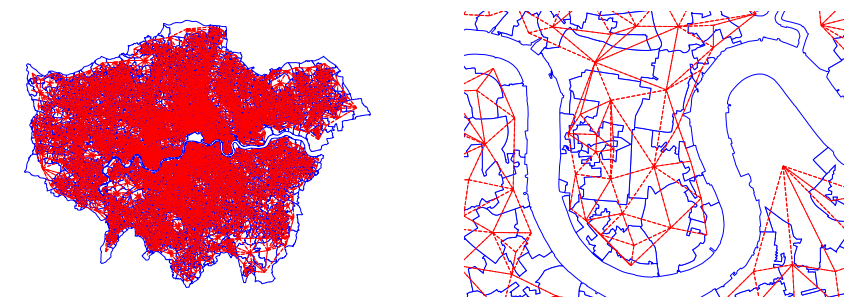

In [44]:
#looking at London
fig, ax = plt.subplots(1,2, figsize = (15,15))

London_crime.plot(edgecolor = "blue", facecolor = "w", ax=ax[0])

wr.plot(London_crime, ax=ax[0],
       edge_kws=dict(color="r", linestyle = "--", linewidth =1),
       node_kws=dict(marker=''))

ax[0].set_axis_off()


#Second plot looking into deepr depth
London_crime.plot(edgecolor = "blue", facecolor = "w", ax=ax[1])

wr.plot(London_crime, ax=ax[1],
       edge_kws=dict(color="r", linestyle = "--", linewidth =1),
       node_kws=dict(marker=''))
#zzoming ino Canary Wharf
ax[1].axis([536_000, 540_000, 178_000, 181_000])

ax[1].set_axis_off()

Now that we have the spatial weights matrix, which shows the connections that occur between LSOAs, the questions becomes to what extent are the variables that we used to cluster, spatially autocorrelated. Essentially, this measures how much crime percentages are related across areas that are geographically close (in our case geographic proximity is defined as sharing a border).

We can test for this globally using the Moran's I value, which measures the global degree of spatial autocorrelation. The greater this value, the greater the potential for values to spillover or be closely related to each other if they are close together. This can be implemented as:

In [45]:
#code from: https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html

#import Moran
from esda.moran import Moran

#extract the resutls for each column
mi_results = [Moran(London_crime[col], wr) for col in to_plot]

#create a table based on this
#extract the variable, and results from the zipped list
table = pd.DataFrame([(to_plot, res.I, res.p_sim) \
                          for to_plot,res \
                          in zip(to_plot, mi_results)
                         ], 
                     #set the columns
                     columns=['Variable', "Moran's I", 'P-value'])\
              .set_index('Variable')
#set the index to the variable

#sort the tables values 
table.sort_values(by= ["Moran's I"], ascending=False)

,Moran's I,P-value
Variable,,
Theft,0.360106,0.001
Vehicle Offences,0.357524,0.001
Robbery,0.310963,0.001
Drug Offences,0.310869,0.001
Violence Against the Person,0.309782,0.001
Burglary,0.259367,0.001
Arson and Criminal Damage,0.147954,0.001
Public Order Offences,0.089594,0.001
Possession of Weapons,0.046584,0.001


From these results we can see that there is a significant degree of spatial autocorrelation across all types of crime, however this is especially strong for Theft, Vehicle offeces, Violence against the Person and Burglary. It is interesting to note this because, compared to our results from the previous workbook, we can see that our interpretation of clusters previously is based on these four types of crime and how they are represented sptailly. 

What is good about agglomerative clustering is that we can add a connectivity constraint in the algorithm so that only adjacent clusters can be merged together. Given that we have a spatial matrix defined by Queens contiguity, then we can input this into the algorithm through the `connectivity` parameter as follows:

In [46]:
#create the model with wards linkage
model = AgglomerativeClustering(linkage="ward", 
                                #define the connectivity
                                connectivity = wr.sparse,
                                #set the distance threshold
                                distance_threshold = 2.5, 
                                n_clusters=None)

#fit the model
model.fit(crime_clus)

AgglomerativeClustering(connectivity=<4829x4829 sparse matrix of type '<class 'numpy.float64'>'
	with 28126 stored elements in Compressed Sparse Row format>,
                        distance_threshold=2.5, n_clusters=None)

For this, given we are using the `connectivity` feature, it is important we are using the wards matrix as this avoids the 'rich getting richer' problem associated with other linkage options [1]. 

Which as we did before, we can plot the results to see how the clusters have worked out:

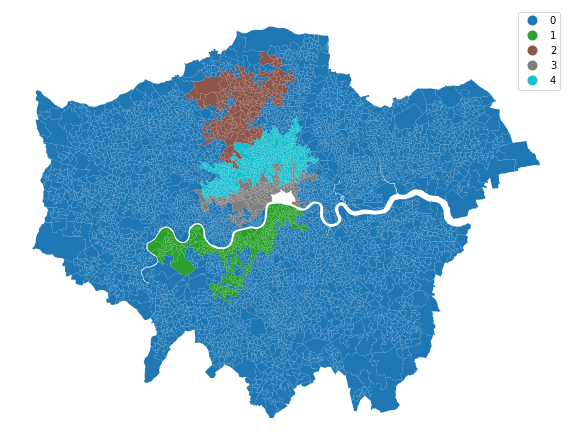

In [47]:
#extract labels
London_crime["Aggl_clus_spa"] = model.labels_

#creating axis
fig, ax =plt.subplots(figsize = (10,10))

#plt the results
London_crime.plot(column = "Aggl_clus_spa", categorical = True, legend=True, ax = ax)
ax.set_axis_off()

And what the clusters look like in terms of their crimes:

C:\Users\phili\anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


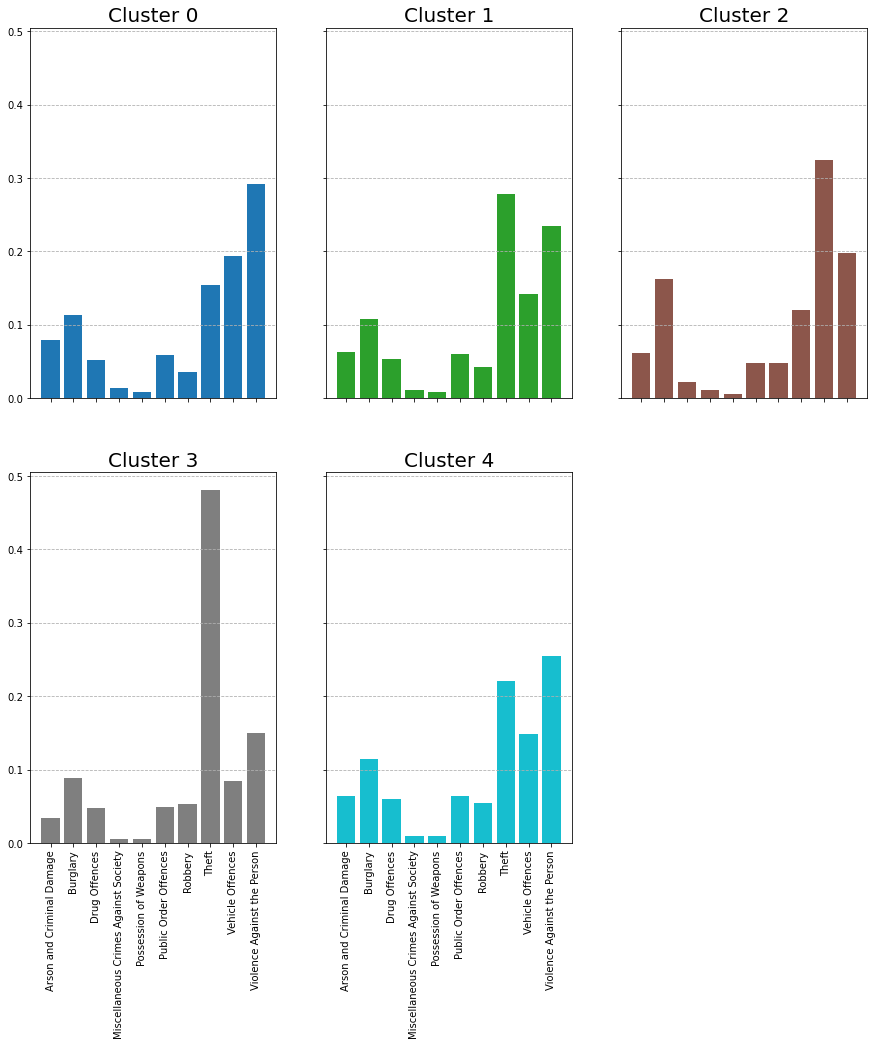

In [56]:
agglom_means =London_crime.groupby("Aggl_clus_spa")[to_plot].mean()

agglom_means_T = pd.DataFrame(agglom_means.T.round(3))

agglom_means_T.reset_index(inplace=True)

colors = ["tab:blue", "tab:green", "tab:brown", "tab:grey", "tab:cyan"]

fig, ax = plt.subplots(2,3, figsize = (15,15), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],
               color = colors[i-1], )
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
        ax.grid(axis = "y", zorder = 0, linestyle = "--")

axis[5].set_axis_off()

In [55]:
agglom_sizes = London_crime.groupby("Aggl_clus_spa").size()
agglom_sizes

Aggl_clus_spa
0    3811
1     261
2     181
3     159
4     417
dtype: int64

We can then interpret this as:

Cluster 0: High Violence against the person, broad London </br>

Cluster 1: High Theft and Public Order Offences, South West Central London </br>

Cluster 2: High vehicle offences and Burglary, Outer North London </br>

Cluster 3: High Theft, Central London </br>

Cluster 4: High Violence and Theft, Mid North London </br>

We can also, like before, create the dendrogram to see how it performs, but this is not the same as it was previously because we have now accounted for geographic proximity:

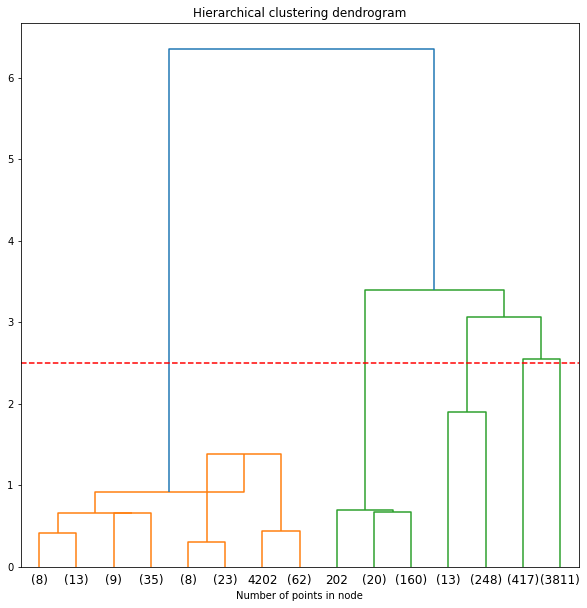

In [54]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
ax.set_xlabel("Number of points in node")
ax.axhline(y = 2.5, color = "r", linestyle = "--")
plt.show()

We can see from this that despite using wards linkage, we still have the issue of one dominant cluster of 0, which contains 3811 LSOAs.

Thus, accounting for geographical proximity in this was may not have produced the desired outcome that we want because the clusters are difficult to interpret both because of their crimes and geographic location. Consequently, alternative methods of spatial proximity could be used, or the percentage of crimes could be standardised such that we aren't looking at percentages but rather variance around the mean. We could also try different linkage or distance metrics to see how the algorithm performed and how the output changes. This therefore highlights the difficulties associated with clustering, in that to get the correct outcome a lot of different methodologies and factors can be considered and that ultimately, whether the result is correct or not, is subjective.

References and links:

1) https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d

2) https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/

3) https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

4) https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

5) https://www.saedsayad.com/clustering_hierarchical.htm#:~:text=In%20average%20linkage%20hierarchical%20clustering,point%20in%20the%20other%20cluster.

6) https://data.london.gov.uk/

7) https://geographicdata.science/book/notebooks/04_spatial_weights.html

8) https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
